In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
games = pd.read_csv('games.csv').set_index('gameID')
performances = pd.read_csv('performances.csv')

In [3]:
games.head(5)

,team1,team2,winner,duration,gold1,gold2,kills1,kills2,bans1,bans2,towers1,inhibs1,barons1,dragons1,heralds1,towers2,inhibs2,barons2,dragons2,heralds2
gameID,,,,,,,,,,,,,,,,,,,,
1,T1,Team Liquid,T1,36:29,67.2k,66.5k,15,14,"['Ziggs', 'Neeko', 'Kalista', 'Kennen', 'Blitz...","['Caitlyn', 'Poppy', 'Azir', 'Jarvan IV', 'Gnar']",7,1,0,2,0,6,0,2,2,2
2,Cloud9,MAD Lions,Cloud9,30:60,59.8k,52.6k,10,3,"['Ivern', 'Kalista', 'Azir', 'Rumble', 'Ahri']","['Orianna', 'LeBlanc', 'Maokai', 'Nautilus', '...",9,1,2,3,1,4,0,0,1,1
3,Gen.G,GAM Esports,Gen.G,22:35,50.4k,37.4k,22,5,"['Syndra', 'Kalista', 'Maokai', 'Rumble', 'Ren...","['Poppy', 'Rakan', 'Orianna', 'Taliyah', 'LeBl...",9,2,1,2,1,1,0,0,0,1
4,Team BDS,JD Gaming,JD Gaming,27:05,47k,53.2k,6,14,"['Kalista', 'Taliyah', 'Kennen', 'Neeko', 'Ren...","['Darius', 'Orianna', 'Maokai', 'Azir', 'Olaf']",5,0,0,1,1,9,2,1,3,1
5,G2 Esports,Dplus KIA,G2 Esports,42:12,80.8k,68.3k,16,9,"['Caitlyn', 'Jarvan IV', 'Lee Sin', 'Vi', 'Rum...","['Neeko', 'Kalista', ""K'Sante"", 'Jax', 'Pyke']",10,2,1,5,2,4,0,2,1,0


## Teams

In [4]:
teams = games[['team1', 'team2']].apply(pd.value_counts)
teams['total games'] = teams['team1'] + teams['team2']
teams = teams.merge(right=games['winner'].value_counts(), how='left', left_on=teams.index, right_on='winner').set_index('winner').convert_dtypes()
teams.index.rename('team', inplace=True)
teams.rename(columns={'count': 'wins'}, inplace=True)
teams.drop(columns=['team1', 'team2'], inplace=True)
teams.fillna(0, inplace=True)

teams['loses'] = teams['total games'] - teams['wins']
teams['w/r %'] = round(teams['wins'] / teams['total games'] * 100, 2)
teams.sort_values(by='w/r %', ascending=False, inplace=True)
teams

,total games,wins,loses,w/r %
team,,,,
T1,15,13,2,86.67
Gen.G,9,6,3,66.67
JD Gaming,13,8,5,61.54
Weibo Gaming,19,11,8,57.89
Bilibili Gaming,18,9,9,50.0
Dplus KIA,8,4,4,50.0
KT Rolster,12,6,6,50.0
NRG,8,4,4,50.0
LNG Esports,11,5,6,45.45


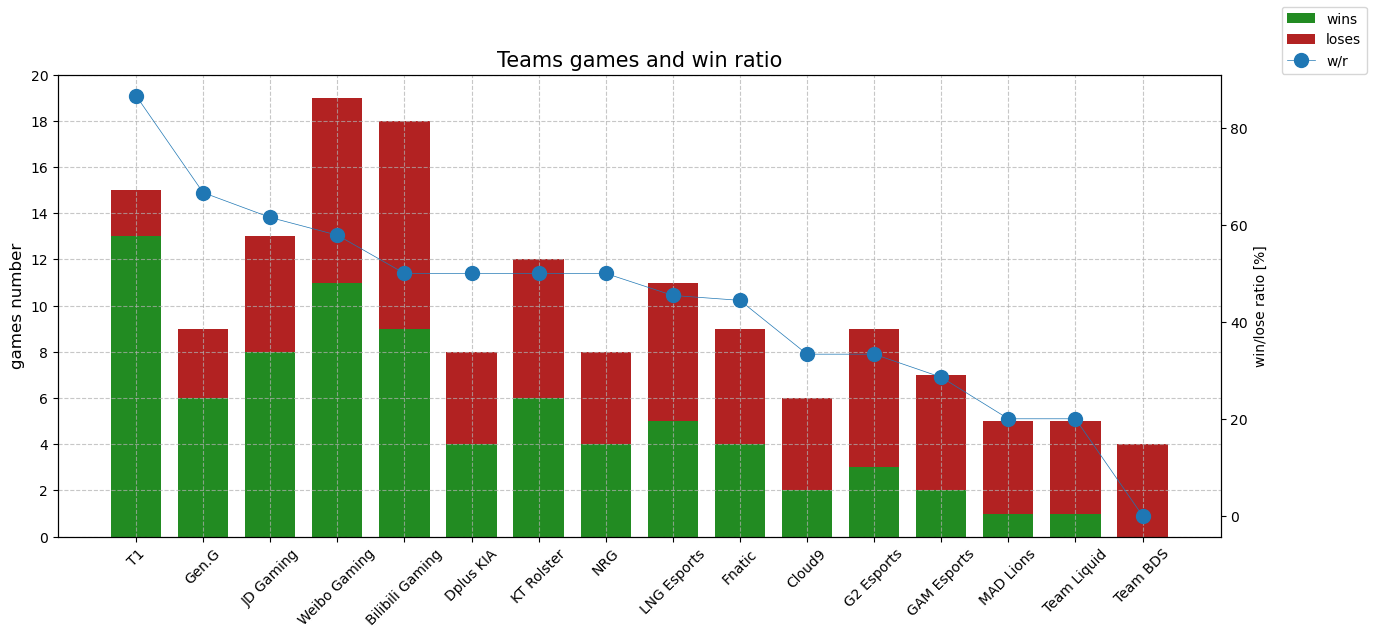

In [5]:
fig, ax = plt.subplots(figsize=(15, 6))

bottom = np.zeros(16)
labels = ['wins', 'loses']
colors = ['forestgreen', 'firebrick']
width = 0.75

ax.set_title('Teams games and win ratio', size=15)

for i, values in enumerate([teams.wins.values, teams.loses.values]):
    ax.bar(teams.index, values, width, label=labels[i], color=colors[i], bottom=bottom)
    bottom += values

ax.set_ylabel('games number', size=12)
ax.set_yticks([i for i in range(0, 21, 2)])
ax.grid(linestyle='--', alpha=.7)
plt.xticks(rotation=45)

ax2 = ax.twinx()
ax2.plot(teams.index, teams['w/r %'], marker='o', linewidth=.5, markersize=10, label='w/r')
ax2.set_ylabel('win/lose ratio [%]', size=10)

fig.legend()
plt.show()

### Blue side vs red side

In [6]:
sides = games[['team1', 'team2', 'winner']].copy()
#sides = pd.DataFrame(0, np.arange(len(games)), columns=['blue', 'red'])
sides['blue'] = sides.apply(lambda x: 1 if x['winner'] == x['team1'] else 0, axis=1)
sides['red'] = sides.apply(lambda x: 1 if x['winner'] == x['team2'] else 0, axis=1)

sides[['blue', 'red']].sum()

blue    47
red     32
dtype: int64

<Axes: title={'center': 'Blue/red side win ratio'}>

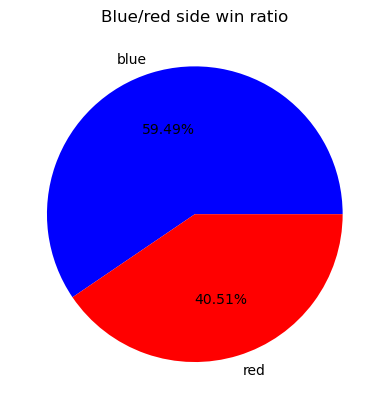

In [7]:
sides[['blue', 'red']].sum().plot(
    kind='pie',
    colors=['blue', 'red'],
    autopct=f'%1.2f%%',
    title='Blue/red side win ratio'
)

## Game length

In [8]:
length = games[['duration']].copy()
length['duration'] = pd.to_datetime(length['duration'], format='%M:%S')
shortest = games.loc[games['duration'] == games['duration'].min()]
s_t1, s_t2, s_w = shortest.team1.values[0], shortest.team2.values[0], shortest.winner.values[0]
longest = games.loc[games['duration'] == games['duration'].max()]
l_t1, l_t2, l_w = longest.team1.values[0], longest.team2.values[0], longest.winner.values[0]

print(f"Shortest game - {games['duration'].min()} {s_t1} vs {s_t2} // winner {s_w}")
print(f"Longest game - {games['duration'].max()} {l_t1} vs {l_t2} // winner {l_w}")
print(f"Average game length {str(length['duration'].mean())[-15:-10]}")

Shortest game - 22:26 T1 vs Cloud9 // winner T1
Longest game - 46:11 Gen.G vs Bilibili Gaming // winner Gen.G
Average game length 31:10


## Gold statistics

In [9]:
gold = games[['team1', 'team2', 'winner', 'duration', 'gold1', 'gold2']].copy()
gold['gold1'] = gold['gold1'].str[:-1].astype('float')
gold['gold2'] = gold['gold2'].str[:-1].astype('float')

#### Max team gold

In [10]:
maxi = gold[['gold1', 'gold2']].max().max()
max_gold = gold.loc[(gold.gold1 == maxi) | (gold.gold2 == maxi)]
max_minutes = int(max_gold.duration.values[0].split(':')[0]) + round(int(max_gold.duration.values[0].split(':')[1]) / 60, 2)
max_gpm = round(max_gold.gold1.values[0] / max_minutes * 1000)
print(f"{max_gold.team1.values[0]} earned {max_gold.gold1.values[0]}k in winning game vs {max_gold.team2.values[0]}\n\
That's {max_gpm} gold per minute")
max_gold

Gen.G earned 90.3k in winning game vs Bilibili Gaming
That's 1955 gold per minute


,team1,team2,winner,duration,gold1,gold2
gameID,,,,,,
58,Gen.G,Bilibili Gaming,Gen.G,46:11,90.3,77.1


#### Min team gold

In [11]:
mini = gold[['gold1', 'gold2']].min().min()
min_gold = gold.loc[(gold.gold1 == mini) | (gold.gold2 == mini)]
min_minutes = int(min_gold.duration.values[0].split(':')[0]) + round(int(min_gold.duration.values[0].split(':')[1]) / 60, 2)
min_gpm = round(min_gold.gold2.values[0] / min_minutes * 1000)
print(f"{min_gold.team2.values[0]} earned {min_gold.gold2.values[0]}k in losing game vs {min_gold.team1.values[0]}\n\
That's {min_gpm} gold per minute")
min_gold

Cloud9 earned 34.5k in losing game vs T1
That's 1538 gold per minute


,team1,team2,winner,duration,gold1,gold2
gameID,,,,,,
22,T1,Cloud9,T1,22:26,48.8,34.5


#### Biggest gold difference

In [12]:
gold['diff'] = abs(gold.gold1 - gold.gold2)
gold.loc[gold['diff'] == gold['diff'].max()]

,team1,team2,winner,duration,gold1,gold2,diff
gameID,,,,,,,
57,Bilibili Gaming,Gen.G,Bilibili Gaming,28:01,58.8,42.4,16.4


### Gold per minute

In [13]:
t1 = games[['team1', 'gold1', 'duration']].copy()
t1.rename(columns={'team1': 'team', 'gold1': 'gold'}, inplace=True)
t2 = games[['team2', 'gold2', 'duration']].copy()
t2.rename(columns={'team2': 'team', 'gold2': 'gold'}, inplace=True)
gpm = pd.concat([t1, t2]).reset_index()
gpm.drop(['gameID'], axis=1, inplace=True)

gpm['gold'] = gpm['gold'].str[:-1].astype('float')
gpm['duration'] = gpm['duration'].str.split(':').str[0].astype('int')\
    + round(gpm['duration'].str.split(':').str[1].astype('int') / 60, 2)
gpm['gpm'] = round(gpm['gold'] / gpm['duration'] * 1000)
gpm = gpm.groupby('team').mean()

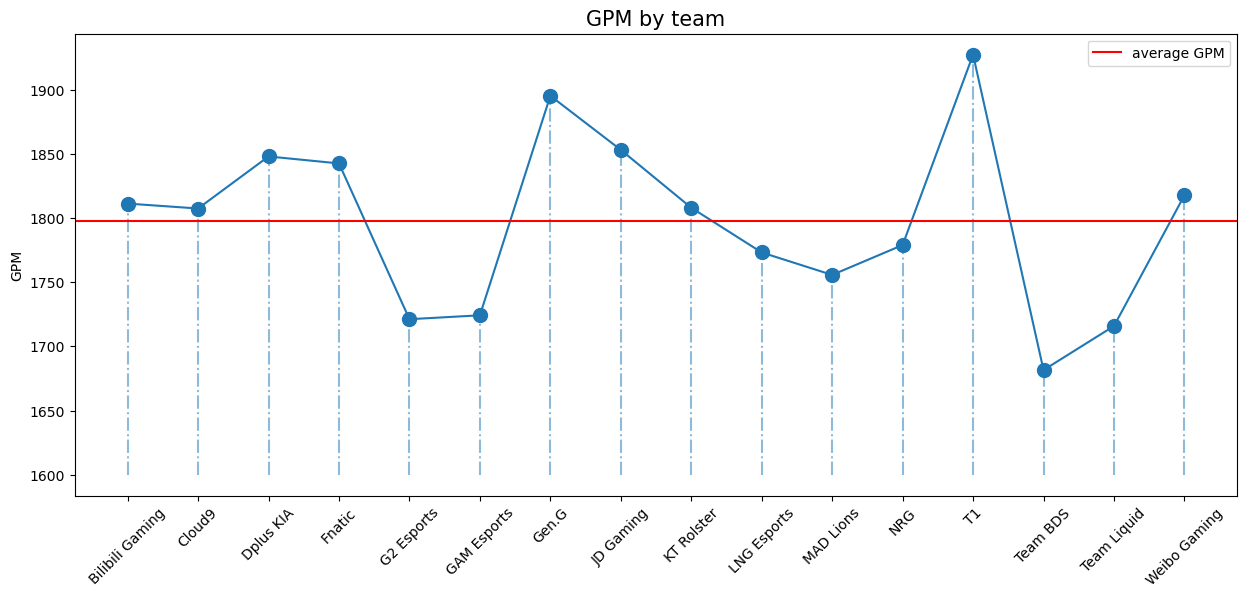

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(gpm.index, gpm['gpm'], marker='o', markersize=10)
ax.vlines(x=gpm.index, ymin=1600, ymax=gpm['gpm'], linestyle='-.', alpha=.5)
ax.set_ylabel('GPM')

plt.axhline(y=gpm['gpm'].mean(), color='red', label='average GPM')
plt.xticks(rotation=45)
plt.legend()
plt.title('GPM by team', size=15)

plt.show()

## Kills statistics

#### Max team kills

In [15]:
max_k = games[['kills1', 'kills2']].max().max()
max_kills = games[['team1', 'team2', 'winner', 'kills1', 'kills2']].loc[(games['kills1'] == max_k) | (games['kills2'] == max_k)]
print(f"Maximum kills in single game: {max_kills.team1.values[0]} got {max_k} kills in winning game vs {max_kills.team2.values[0]}.")
max_kills

Maximum kills in single game: Cloud9 got 27 kills in winning game vs Fnatic.


,team1,team2,winner,kills1,kills2
gameID,,,,,
31,Cloud9,Fnatic,Cloud9,27,7


#### Min team kills

In [16]:
min_k = games[['kills1', 'kills2']].min().min()
min_kills = games[['team1', 'team2', 'winner', 'kills1', 'kills2']].loc[(games['kills1'] == min_k) | (games['kills2'] == min_k)]
print(f"Minimum kills in singe game: {min_kills.team2.values[0]} got {min_k} kills in losing game vs {min_kills.team1.values[0]}.")
min_kills

Minimum kills in singe game: Cloud9 got 0 kills in losing game vs T1.


,team1,team2,winner,kills1,kills2
gameID,,,,,
22,T1,Cloud9,T1,15,0


#### Biggest kills difference

In [17]:
kills_diff = games[['team1', 'team2', 'winner', 'kills1', 'kills2']].copy()
kills_diff['diff'] = abs(kills_diff['kills1'] - kills_diff['kills2'])
kills_diff.loc[kills_diff['diff'] == kills_diff['diff'].max()]

,team1,team2,winner,kills1,kills2,diff
gameID,,,,,,
31,Cloud9,Fnatic,Cloud9,27,7,20
41,NRG,G2 Esports,NRG,23,3,20


### Total kills by team

In [18]:
tk1 = games[['team1', 'kills1', 'kills2']].copy()
tk1.rename(columns={'team1': 'team', 'kills1': 'kills', 'kills2': 'deaths'}, inplace=True)
tk2 = games[['team2', 'kills2', 'kills1']].copy()
tk2.rename(columns={'team2': 'team', 'kills2': 'kills', 'kills1': 'deaths'}, inplace=True)
total_kills = pd.concat([tk1, tk2]).reset_index()
total_kills.drop(['gameID'], axis=1, inplace=True)
total_kills = total_kills.groupby(by='team').sum()

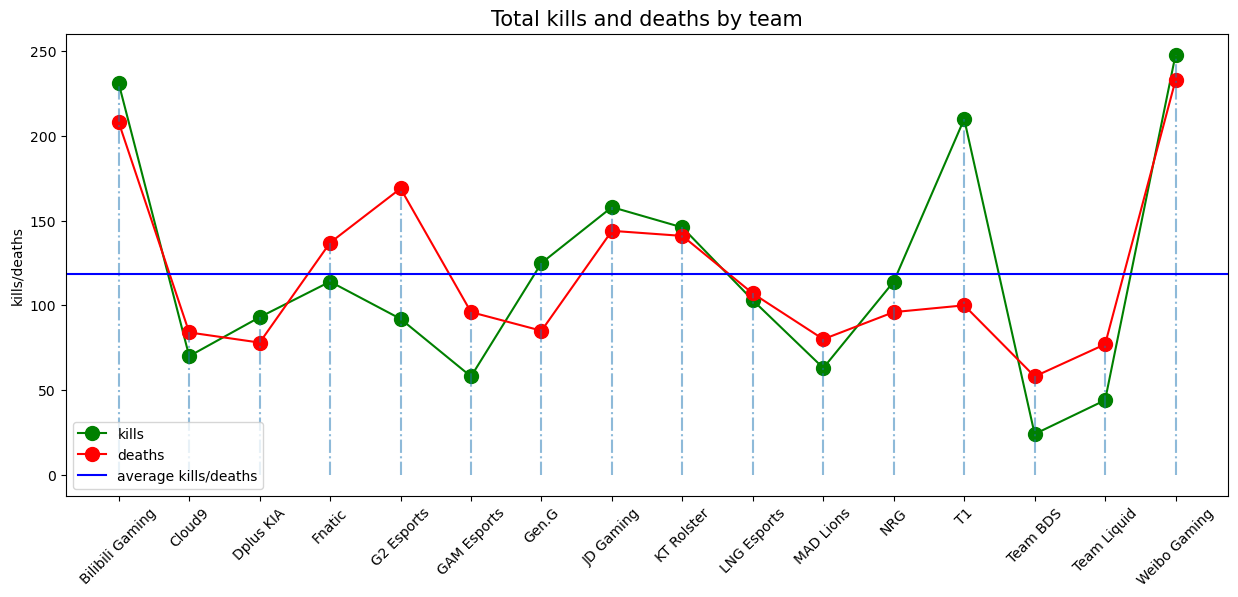

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))

v_line_max = [max(i[0], i[1]) for i in total_kills[['kills', 'deaths']].values]
ax.plot(total_kills.index, total_kills['kills'], marker='o', markersize=10, color='green', label='kills')
ax.plot(total_kills.index, total_kills['deaths'], marker='o', markersize=10, color='red', label='deaths')
ax.vlines(x=total_kills.index, ymin=0, ymax=v_line_max, linestyle='-.', alpha=.5)
ax.set_ylabel('kills/deaths')

plt.axhline(y=total_kills['kills'].mean(), color='blue', label='average kills/deaths')
plt.xticks(rotation=45)
plt.legend()
plt.title('Total kills and deaths by team', size=15)

plt.show()

## Other statistics

In [20]:
s1 = games[['team1', 'towers1', 'inhibs1', 'dragons1', 'heralds1']].copy()
s1.rename(columns={'team1': 'team', 'towers1': 'towers', 'inhibs1': 'inhibs', 'dragons1': 'dragons', 'heralds1': 'heralds'}, inplace=True)
s2 = games[['team2', 'towers2', 'inhibs2', 'dragons2', 'heralds2']].copy()
s2.rename(columns={'team2': 'team', 'towers2': 'towers', 'inhibs2': 'inhibs', 'dragons2': 'dragons', 'heralds2': 'heralds'}, inplace=True)
others = pd.concat([s1, s2]).reset_index()
others.drop(['gameID'], axis=1, inplace=True)
others = others.groupby(by='team').sum()
others

,towers,inhibs,dragons,heralds
team,,,,
Bilibili Gaming,111,18,46,16
Cloud9,32,3,7,8
Dplus KIA,52,7,23,10
Fnatic,49,5,24,8
G2 Esports,39,4,16,9
GAM Esports,25,4,8,7
Gen.G,63,10,21,8
JD Gaming,80,15,28,12
KT Rolster,70,10,24,14


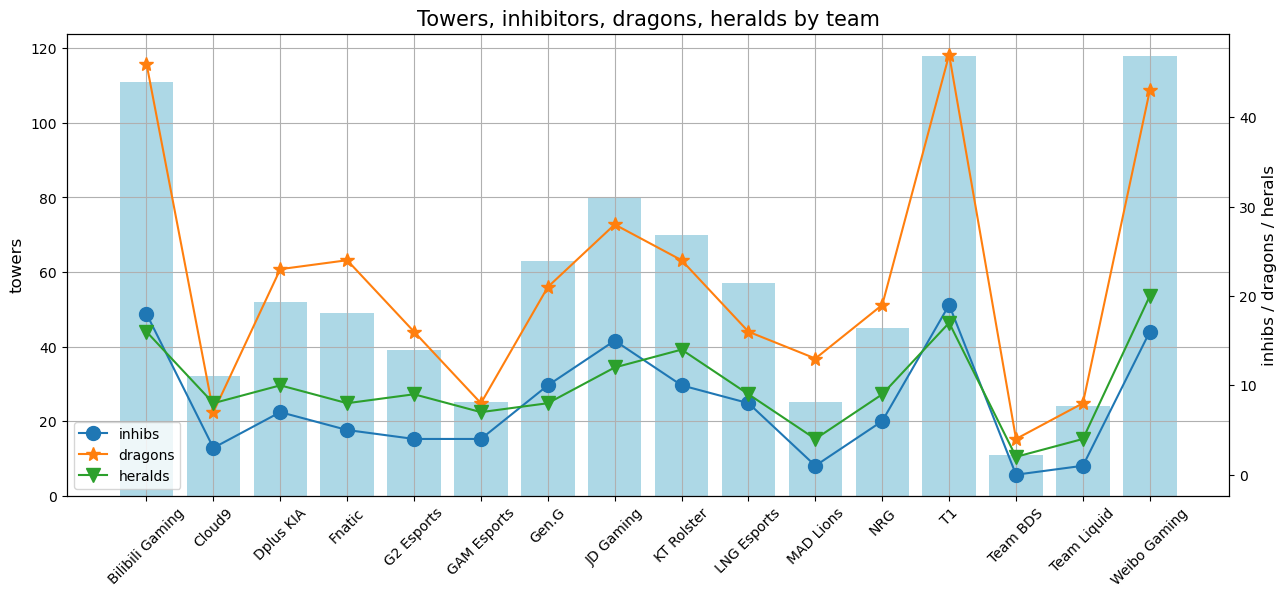

In [21]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(others.index, others.towers, color='lightblue')
ax.set_ylabel('towers', size=12)
ax.grid()
plt.xticks(rotation=45)

ax2 = ax.twinx()
ax2.plot(others.index, others.inhibs, marker='o', markersize=10, label='inhibs')
ax2.plot(others.index, others.dragons, marker='*', markersize=10, label='dragons')
ax2.plot(others.index, others.heralds, marker='v', markersize=10, label='heralds')
ax2.set_ylabel('inhibs / dragons / herals', size=12)
ax2.legend()

plt.title('Towers, inhibitors, dragons, heralds by team', size=15)
plt.show()

## Most picked & banned champions

In [22]:
BANS = {}
for bans in games[['bans1', 'bans2']].values:
    champs = bans[0][2:-2].replace('"', "'").split("', '") + bans[1][2:-2].replace('"', "'").split("', '")
    for ban in champs:
        BANS[ban] = BANS[ban] + 1 if ban in BANS.keys() else 1

In [23]:
pb = pd.concat([performances['champion'].value_counts(), pd.Series(BANS)], axis=1)
pb.fillna(0, inplace=True)
pb.rename(columns={'count': 'picks', 0: 'bans'}, inplace=True)
pb = pb.astype({'picks': 'int', 'bans': 'int'})
# drop champion with PB apperance less than 10
pb = pb.loc[pb.picks + pb.bans >= 10].sort_values(by='picks')

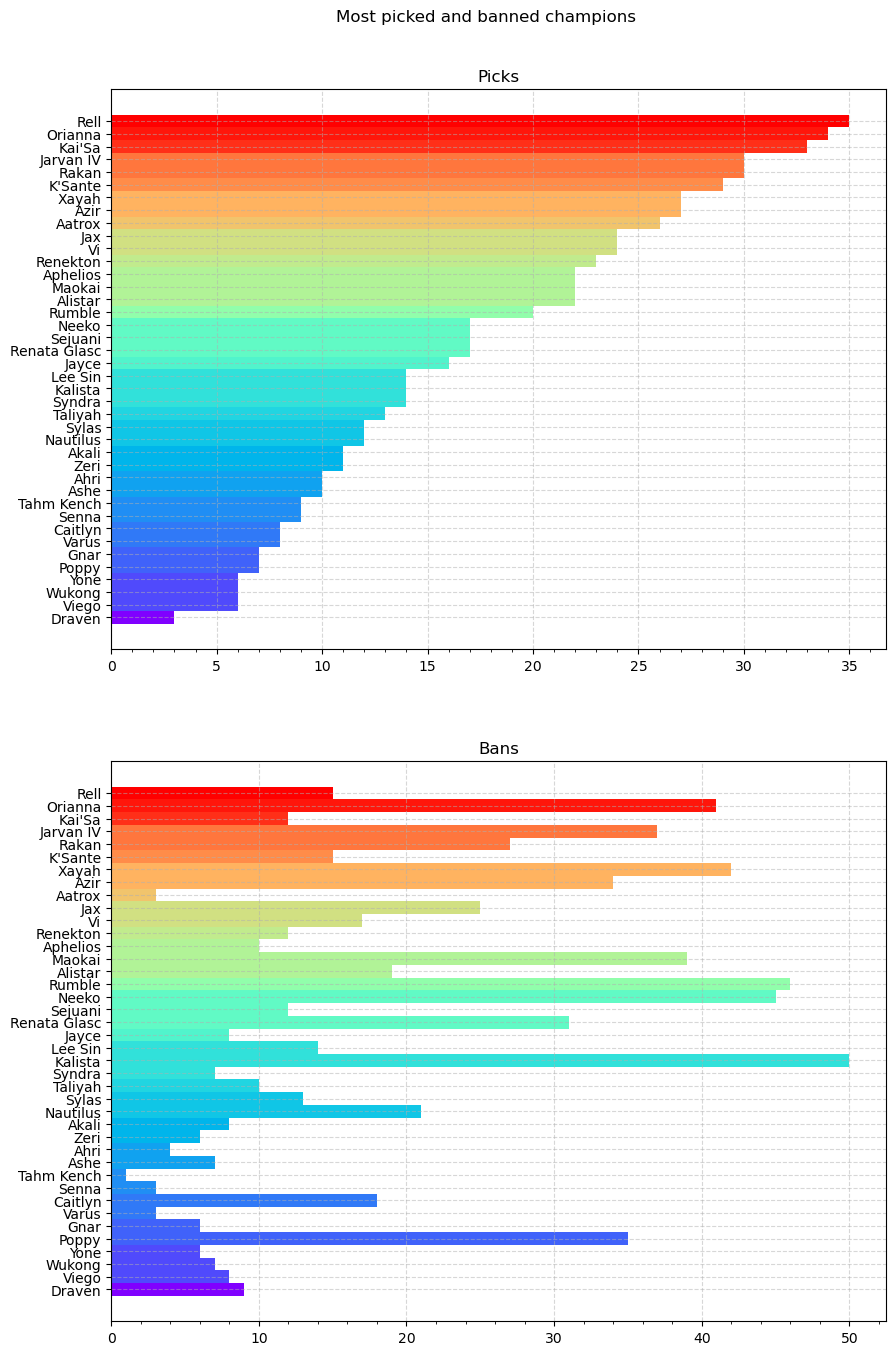

In [24]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 16))
fig.suptitle('Most picked and banned champions', y=0.93)

cmap = plt.colormaps['rainbow']
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
colors = cmap(rescale(pb.picks))

ax1.barh(pb.index, pb.picks, height=1, color=colors)
ax1.set_title('Picks')

ax2.barh(pb.index, pb.bans, height=1, color=colors)
ax2.set_title('Bans')

for ax in [ax1, ax2]:
    ax.grid(linestyle='--', alpha=.5)
    ax.minorticks_on()
    ax.yaxis.set_tick_params(which='minor', left=False)

plt.show()

In [25]:
pb['left'] = round(pb['picks'] / (pb['picks'] + pb['bans']) * 100, 1)
pb['right'] = 100 - pb['left']

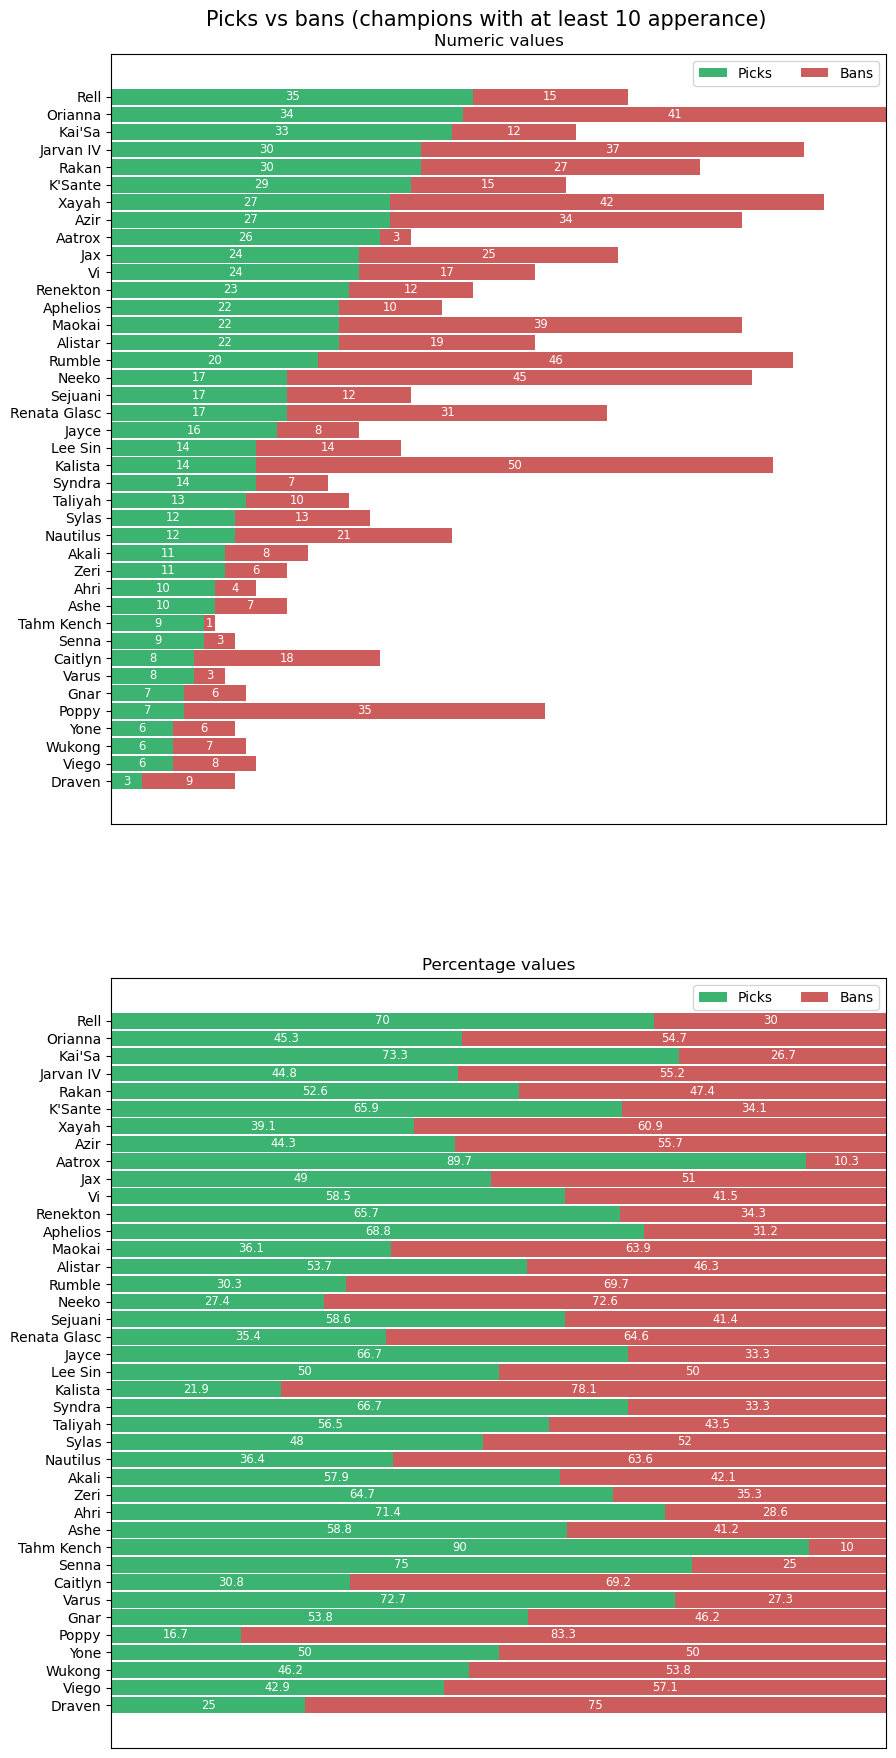

In [26]:
def subplot(results, columns):
    data = results.values
    data_cum = data.cumsum(axis=1)
    bar_colors = ['mediumseagreen', 'indianred']
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(columns, bar_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(pb.index, widths, left=starts, height=.9, label=colname, color=color)
        ax.bar_label(rects, label_type='center', color='white', fontsize='small')

    ax.legend(ncols=len(columns), loc='upper right')

    return ax

columns = ['Picks', 'Bans']
data = [pb[['picks', 'bans']], pb[['left', 'right']]]
fig, axes = plt.subplots(2, figsize=(10, 22))
for ax, d in zip(axes, data):
    subplot(d, columns)
    
axes[0].set_title('Numeric values')
axes[1].set_title('Percentage values')
fig.suptitle('Picks vs bans (champions with at least 10 apperance)', y=.9, size=15)

plt.show()

## Top KDA players

In [27]:
performances['gold'] = performances['gold'].str[:-1].astype('float')

In [28]:
kda = performances[['player', 'kills', 'deaths', 'assists', 'cs', 'gold']].groupby('player').agg(
    games=('player', 'count'),
    kills=('kills', 'sum'),
    deaths=('deaths', 'sum'),
    assists=('assists', 'sum'),
    cs=('cs', 'sum'),
    gold=('gold', 'sum')
)
kda
kda['kda'] = round((kda['kills'] + kda['assists']) / kda['deaths'], 2)
kda[['games', 'kills', 'deaths', 'assists', 'kda']].sort_values('kda', ascending=False).head(5)

,games,kills,deaths,assists,kda
player,,,,,
Gumayusi,15,56,12,71,10.58
0N,1,0,2,17,8.50
Keria,15,13,19,146,8.37
Peyz,9,42,12,40,6.83
Aiming,12,68,18,53,6.72


*Note: 0N played only 1 game. Gumayusi is the GOAT.

#### Top 5 killers

In [29]:
kda[['games', 'kills', 'kda']].sort_values('kills', ascending=False).head()

,games,kills,kda
player,,,
Light,19,84,5.76
Aiming,12,68,6.72
Xiaohu,19,67,3.76
Elk,18,63,4.08
Zeus,15,58,4.96


#### Top 5 assisters

In [30]:
kda[['games', 'assists', 'kda']].sort_values('assists', ascending=False).head()

,games,assists,kda
player,,,
Crisp,19,168,3.81
Keria,15,146,8.37
ON,17,139,3.92
Weiwei,19,137,3.39
Oner,15,136,6.65


#### Most deaths

In [31]:
kda[['games', 'deaths', 'kda']].sort_values('deaths', ascending=False).head()

,games,deaths,kda
player,,,
TheShy,19,64,2.09
Weiwei,19,49,3.39
Crisp,19,48,3.81
Bin,18,46,2.57
Yagao,18,45,3.53


## Players CS & gold

#### Top 5 minions slayers

In [32]:
kda['cs/game'] = round(kda['cs'] / kda['games']).astype('int')
kda[['cs', 'games', 'cs/game', 'kda']].sort_values('cs', ascending=False).head()

,cs,games,cs/game,kda
player,,,,
Elk,5605,18,311,4.08
Light,5375,19,283,5.76
Xiaohu,5204,19,274,3.76
Yagao,4911,18,273,3.53
Bin,4767,18,265,2.57


#### Top 5 richest players

In [33]:
kda['gold/game'] = round(kda['gold'] / kda['games'] * 1000).astype('int')
kda['gold'] = (kda['gold'] * 1000).astype('int')

In [34]:
kda[['gold', 'games', 'gold/game', 'kda']].sort_values('gold', ascending=False).head()

,gold,games,gold/game,kda
player,,,,
Elk,264500,18,14694,4.08
Light,260200,19,13695,5.76
Xiaohu,247300,19,13016,3.76
Yagao,234700,18,13039,3.53
Bin,230200,18,12789,2.57


## Most popular rune

In [35]:
df = performances.merge(right=games[['winner']], left_on='gameID', right_on=games.index)
df['winner'] = np.where(df['team'] == df['winner'], 1, 0)
df = df.groupby('rune').agg(picked=('rune', 'count'), wins=('winner', 'sum'))
df['loses'] = df['picked'] - df['wins']
df['w/r'] = round(df['wins'] / df['picked'] * 100, 2)

In [36]:
df.sort_values('picked', ascending=False)

,picked,wins,loses,w/r
rune,,,,
Conqueror,159,78,81,49.06
Lethal Tempo,113,63,50,55.75
Glacial Augment,65,27,38,41.54
Phase Rush,61,26,35,42.62
Fleet Footwork,56,29,27,51.79
Guardian,54,36,18,66.67
Grasp of the Undying,51,22,29,43.14
Arcane Comet,49,30,19,61.22
Aftershock,45,24,21,53.33


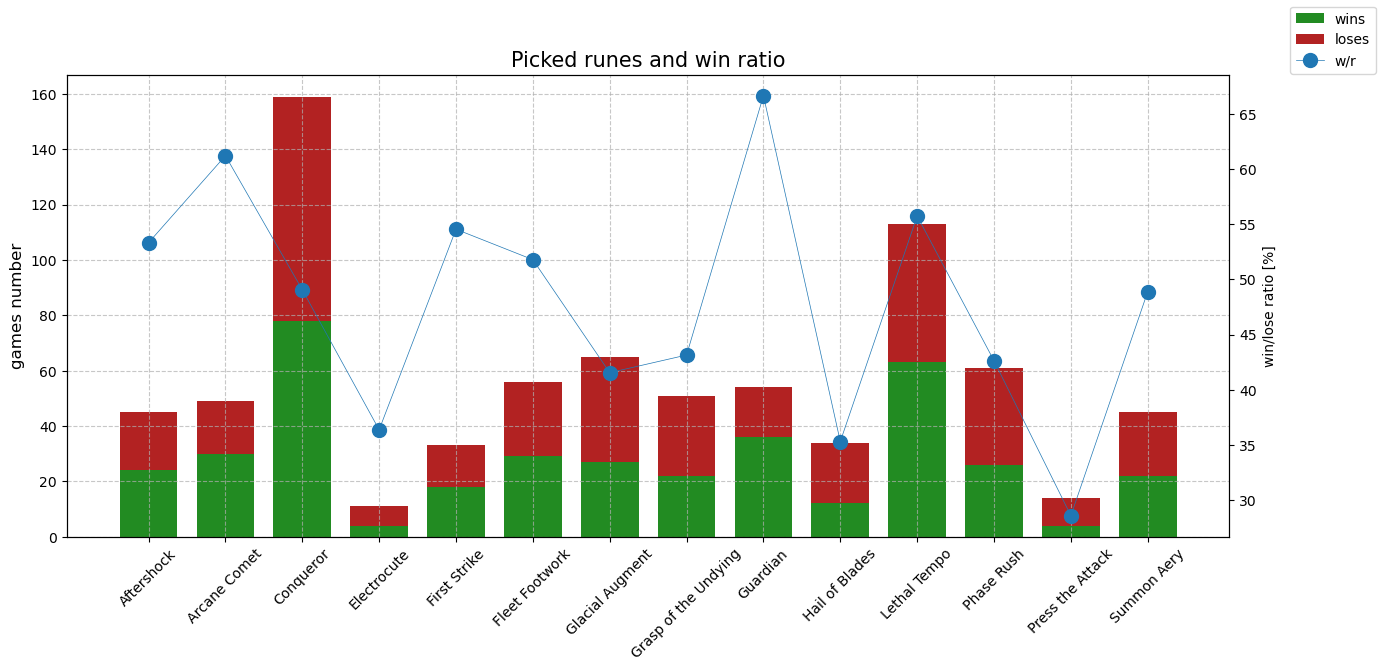

In [37]:
fig, ax = plt.subplots(figsize=(15, 6))

bottom = np.zeros(df.shape[0])
labels = ['wins', 'loses']
colors = ['forestgreen', 'firebrick']
width = 0.75

ax.set_title('Picked runes and win ratio', size=15)

for i, values in enumerate([df.wins.values, df.loses.values]):
    ax.bar(df.index, values, width, label=labels[i], color=colors[i], bottom=bottom)
    bottom += values

ax.set_ylabel('games number', size=12)
ax.grid(linestyle='--', alpha=.7)
plt.xticks(rotation=45)

ax2 = ax.twinx()
ax2.plot(df.index, df['w/r'], marker='o', linewidth=.5, markersize=10, label='w/r')
ax2.set_ylabel('win/lose ratio [%]', size=10)

fig.legend()
plt.show()